## Importing the Header Files and Reading the Datasets

In [1]:
import pandas as pd
import numpy as np
import nltk
from rake_nltk import Rake
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
# Reading the datasets into pandas Dataframe
df_movies = pd.read_csv("IMDb movies.csv")
df_ratings = pd.read_csv("IMDb ratings.csv")

In [3]:
# Taking a look at all the columns in the dataframe(s)
print("Columns for Movie Details: \n",df_movies.columns)
print("Columns for Movie Rating statistics: \n", df_ratings.columns)

Columns for Movie Details: 
 Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')
Columns for Movie Rating statistics: 
 Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_

In [4]:
# Taking a look at the Movie Details Dataframe
df_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [5]:
# Taking a look at the Movie Rating Statistics Dataframe
df_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000574,6.1,537,6.3,6.0,54,17,55,121,122,...,6.0,19.0,6.6,14.0,6.3,64.0,6.0,89.0,6.2,309.0
1,tt0001892,5.9,171,6.1,6.0,5,6,17,41,52,...,5.8,4.0,6.5,8.0,5.9,29.0,6.2,27.0,6.0,114.0
2,tt0002101,5.2,420,5.2,5.0,12,8,16,60,89,...,5.5,14.0,6.2,20.0,4.9,57.0,5.5,197.0,4.7,103.0
3,tt0002130,7.0,2019,6.9,7.0,194,208,386,571,308,...,7.3,74.0,7.4,75.0,7.0,126.0,7.1,452.0,7.0,1076.0
4,tt0002199,5.7,438,5.8,6.0,28,15,42,75,114,...,4.8,10.0,6.5,15.0,5.7,56.0,5.9,161.0,5.7,164.0


## Data Cleaning

In [6]:
# Removing all the unwanted columns from the two Dataframes
df_movies = df_movies[['imdb_title_id','title', 'duration', 'year', 'genre', 'language', 'actors', 'director','description']]
df_ratings = df_ratings[['imdb_title_id', 'mean_vote', 'weighted_average_vote','median_vote', 'total_votes']]

In [7]:
#Again Taking a look at all the columns in the dataframe(s) after dropping unwanted columns
print("Columns for Movie Details: \n",df_movies.columns)
print("Columns for Movie Rating statistics: \n", df_ratings.columns)

Columns for Movie Details: 
 Index(['imdb_title_id', 'title', 'duration', 'year', 'genre', 'language',
       'actors', 'director', 'description'],
      dtype='object')
Columns for Movie Rating statistics: 
 Index(['imdb_title_id', 'mean_vote', 'weighted_average_vote', 'median_vote',
       'total_votes'],
      dtype='object')


In [8]:
# Merging the two dataframes and dropping all the nan values
df = pd.merge(df_movies, df_ratings, on='imdb_title_id')
print("Shape, Before dropping Nan Values: ",df.shape)
df.dropna(inplace = True)
print("Shape, After dropping Nan Values: ",df.shape)

Shape, Before dropping Nan Values:  (81273, 13)
Shape, After dropping Nan Values:  (78011, 13)


In [9]:
# Take only the movies which are in English, Hindi, Malayalam, Tamil, Telugu, Kannada
# Converting all strings to lowercase
df2 = df.loc[df['language'].str.contains(r'English')]
df2 = df2.loc[(df2['mean_vote'] >= 6) & (df['total_votes'] >= 1000)] # Take all English Movies with Rating greater than 6
df2 = df2[df2['year'] >= 1970]
df3 = df[df['language'].str.contains(r'Tamil|Kannada|Telugu|Hindi|Malayalam')]
df3 = df3[(df3['mean_vote'] >= 5) & (df3['total_votes'] >= 500)]
#print("Shape of the dataframe after dropping selected movies: ",df.shape)

df = pd.concat([df2,df3])
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'O') else x)
df = df.drop_duplicates(subset=['title','year'], keep = 'last')
df.dropna(inplace = True)
print("Shape, After dropping Nan Values: ",df.shape)
df.reset_index(drop=True,inplace=True)
df.shape

Shape, After dropping Nan Values:  (13460, 13)


(13460, 13)

In [10]:
df.head()

,imdb_title_id,title,duration,year,genre,language,actors,director,description,mean_vote,weighted_average_vote,median_vote,total_votes
0,tt0035423,kate & leopold,118,2001,"comedy, fantasy, romance","english, french","meg ryan, hugh jackman, liev schreiber, brecki...",james mangold,an english duke from 1876 is inadvertedly drag...,6.6,6.4,7.0,75298
1,tt0064177,colossus: the forbin project,100,1970,"sci-fi, thriller","english, russian","eric braeden, susan clark, gordon pinsent, wil...",joseph sargent,"thinking this will prevent war, the us governm...",7.3,7.1,7.0,7591
2,tt0064437,the honeymoon killers,107,1970,"crime, drama, romance",english,"shirley stoler, tony lo bianco, mary jane higb...","leonard kastle, donald volkman","an obese, embittered nurse doesn't mind if her...",7.1,7.0,7.0,3996
3,tt0064704,"mumsy, nanny, sonny & girly",102,1970,"comedy, crime, horror",english,"michael bryant, ursula howells, pat heywood, h...",freddie francis,"a wealthy, fatherless british clan kidnaps bum...",6.7,6.6,7.0,1025
4,tt0064791,le passager de la pluie,120,1970,"crime, drama, mystery","french, english","charles bronson, marlène jobert, gabriele tint...",rené clément,a us army colonel in france tries to track dow...,7.1,6.9,7.0,2558


## Data Analysis

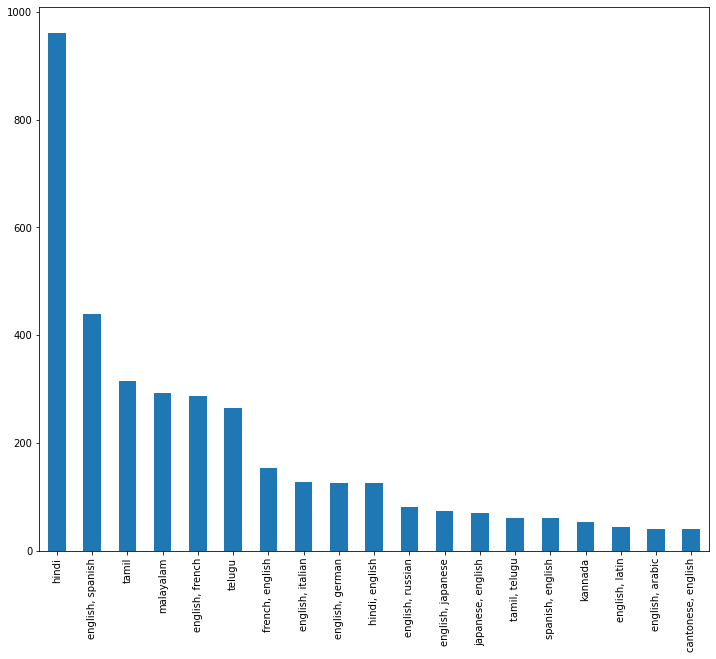

In [11]:
# Taking a look at the different movie languages
df['language'].value_counts()[1:20].plot(kind = 'bar', figsize = [12,10])

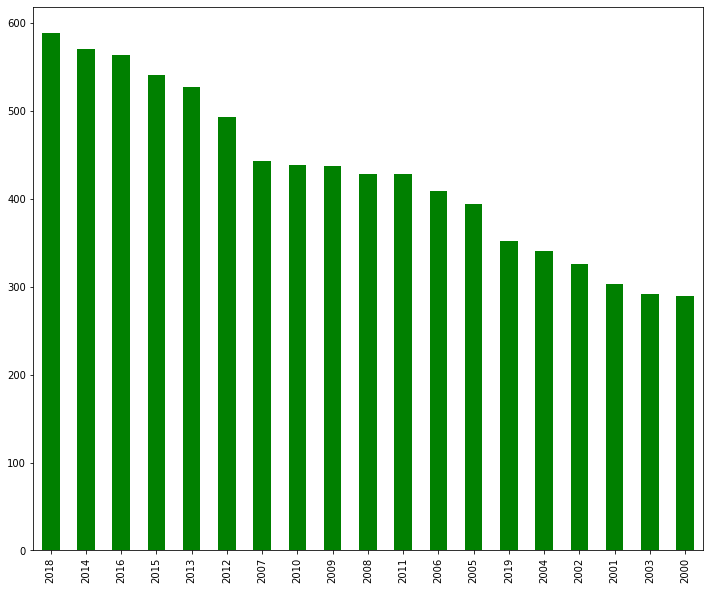

In [12]:
# Taking a look at the number of movies released in a year
df['year'].value_counts()[1:20].plot(kind = 'bar', figsize = [12,10], color='green')

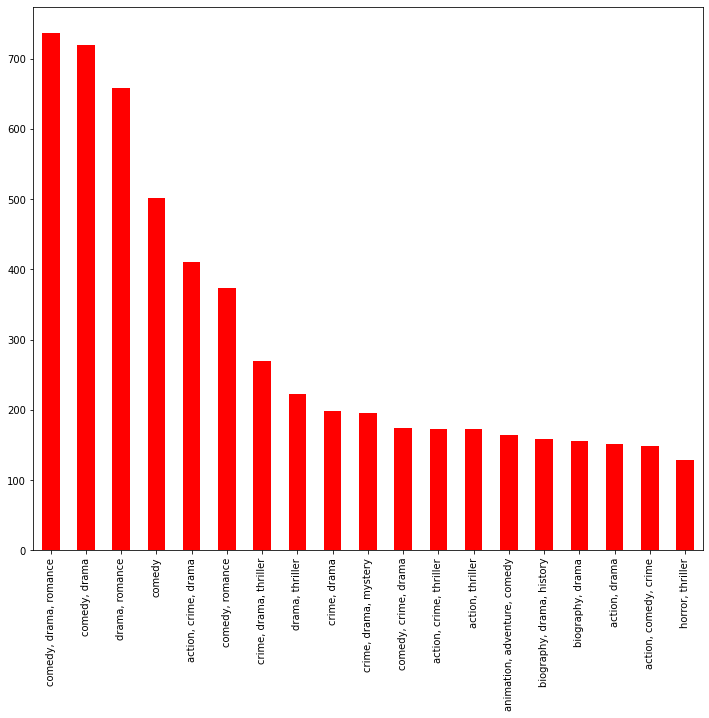

In [13]:
# Taking a look at the number of movies based on the different Genres
df['genre'].value_counts()[1:20].plot(kind = 'bar', figsize = [12,10], color='red')

## Data Preprocessing (Removing Stop-words, Capital Letters to Lower Case)

In [14]:
df['Key_words'] = ''
r = Rake()
for index, row in df.iterrows():
    r.extract_keywords_from_text(row['description'])
    key_words_dict_scores = r.get_word_degrees()
    row['Key_words'] = list(key_words_dict_scores.keys())
    df['Key_words'][index] = row['Key_words']
print(df['Key_words'])

0        [english, duke, inadvertedly, dragged, modern,...
1        [launching, nuclear, missiles, creators, unima...
2        [mind, fleeces, along, embittered, nurse, toup...
3        [attempt, escape, fatherless, british, clan, k...
4        [france, tries, track, escaped, sex, maniac, u...
                               ...                        
13455    [story, three, friends, studying, inter, consi...
13456    [psychiatrist, autistic, patient, isolated, ho...
13457    [path, injured, cop, wants, convicted, crimina...
13458    [lives, abhi, trivandrum, two, youngsters, day...
13459    [mother, sixty, year, old, dalit, worker, azha...
Name: Key_words, Length: 13460, dtype: object


In [15]:
df['genre'] = df['genre'].map(lambda x: x.split(','))
for index, row in df.iterrows():
    row['genre'] = [x.lower().replace(' ','') for x in row['genre']]

In [16]:
df['Bag_of_words'] = ''
columns = ['genre', 'Key_words']
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    df['Bag_of_words'][index] = words
    
dfn = df[['title','Bag_of_words']]

In [17]:
dfn['Bag_of_words']

0        comedy  fantasy  romance english duke inadvert...
1        sci-fi  thriller launching nuclear missiles cr...
2        crime  drama  romance mind fleeces along embit...
3        comedy  crime  horror attempt escape fatherles...
4        crime  drama  mystery france tries track escap...
                               ...                        
13455    comedy story three friends studying inter cons...
13456    mystery  thriller psychiatrist autistic patien...
13457    action  thriller path injured cop wants convic...
13458    drama lives abhi trivandrum two youngsters day...
13459    drama mother sixty year old dalit worker azhag...
Name: Bag_of_words, Length: 13460, dtype: object

In [18]:
# Function to Perform Cosine Similarity in Batches
def cosine_similarity_n_space(m1, m2, batch_size=10000):
    assert m1.shape[1] == m2.shape[1]
    ret = np.ndarray((m1.shape[0], m2.shape[0]))
    for row_i in range(0, int(m1.shape[0] / batch_size) + 1):
        start = row_i * batch_size
        end = min([(row_i + 1) * batch_size, m1.shape[0]])
        if end <= start:
            break 
        rows = m1[start: end]
        sim = cosine_similarity(rows, m2) 
        ret[start: end] = sim
    return ret

In [19]:
# Creating a Cosine matrix to compare Movies
count = CountVectorizer()
count_matrix = count.fit_transform(dfn['Bag_of_words'])
cosine_sim = cosine_similarity_n_space(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.         0.05892557 ... 0.         0.06063391 0.        ]
 [0.         1.         0.         ... 0.04662524 0.         0.        ]
 [0.05892557 0.         1.         ... 0.         0.0571662  0.04811252]
 ...
 [0.         0.04662524 0.         ... 1.         0.05057217 0.04256283]
 [0.06063391 0.         0.0571662  ... 0.05057217 1.         0.04950738]
 [0.         0.         0.04811252 ... 0.04256283 0.04950738 1.        ]]


In [20]:
indices = pd.Series(dfn['title'])
def recommend(title, num=10, cosine_sim = cosine_sim):
    recommended_movies = []
    try:
        idx = indices[indices == title].index[0]
        score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
        indx = list(score_series.iloc[1:num+1].index)

        for i in indx:
            recommended_movies.append(list(dfn['title'])[i])
        print("\nGreat Choice. Here is the list of similar movies:")
        k = 1;
        for i in recommended_movies:
            print(k,i.title())
            k+=1;
        return False
    except:
        print("I'm sorry but I could not find such a movie in our Database.")
        print("I'd recommend you to check the spelling of the movie you entered.")
        print("Also make sure it belongs to the same genre and language you had entered before.")
        return True

In [ ]:
ans = True
while (ans):
    user_res = input("Enter the movie which you have in mind.").lower()
    num = int(input("How many such similar movies do you want??"))
    ans = recommend(user_res,num)